In [1]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [2]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [3]:
#define list to store Name of the customers
cust_name = []
review_title = []
rate = []
review_content = []


In [8]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [5]:
len(cust_name)

2318

In [6]:
len(review_title)

2318

In [7]:
len(review_content)

2318

In [9]:
len(rate)

2326

In [10]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]


In [11]:
get_ipython().system('pip install -U textblob')
get_ipython().system('python -m textblob.download_corpora')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


Finished.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df = pd.DataFrame()

In [15]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [16]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,ba_doh,Read this review before you buy ... may save y...,4.0 out of 5 stars,Okay. So you have been seeing people display...
1,Shantanu Bangar,Superb,5.0 out of 5 stars,It's amazing..... battery last around 10 -12...
2,PK Singh,"Finally, got my Mac !!!!",5.0 out of 5 stars,Finally a MacBook possession. Got it in 50k ...
3,Sumit Kukade,DEAD after 1 year two months...,1.0 out of 5 stars,We buy macbook's expecting that it will last...
4,saurabh chauhan,My first apple product: fully satisfied- here ...,5.0 out of 5 stars,Best Laptop under 60k. If you don't want any...
5,Kaushal,Justified Apple Product,5.0 out of 5 stars,Pros:1. Light weight and super fast response...
6,Anvit shetty,Dead mac book air,1.0 out of 5 stars,"Bought this product recently on 5 April, was..."
7,Romeo Menezes,MacBook motherboard and battery collapsed.,1.0 out of 5 stars,I am very upset about the product as I check...
8,Amazon Customer,The sound quality was not good. My laptop star...,1.0 out of 5 stars,Reason for 1 star is I ot an defective piece...
9,Jagdeep Sharma,Takes six figure out of your pocket and then d...,1.0 out of 5 stars,"Hi, Think thousand time before buying. One c..."


In [17]:
df.to_csv(r'E:fill.csv',index = True)

In [18]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [19]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [20]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [21]:
data['Rating']

0       4.0
1       5.0
2       5.0
3       1.0
4       5.0
       ... 
2321    5.0
2322    5.0
2323    3.0
2324    5.0
2325    5.0
Name: Rating, Length: 2326, dtype: object

In [22]:
data['Rating'].value_counts(normalize=True)*100

5.0    67.110920
1.0    13.886500
4.0    12.725709
3.0     3.439381
2.0     2.837489
Name: Rating, dtype: float64

In [23]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,323,323,323
2.0,66,66,66
3.0,80,80,80
4.0,296,296,296
5.0,1561,1561,1559


Text(0, 0.5, 'Count')

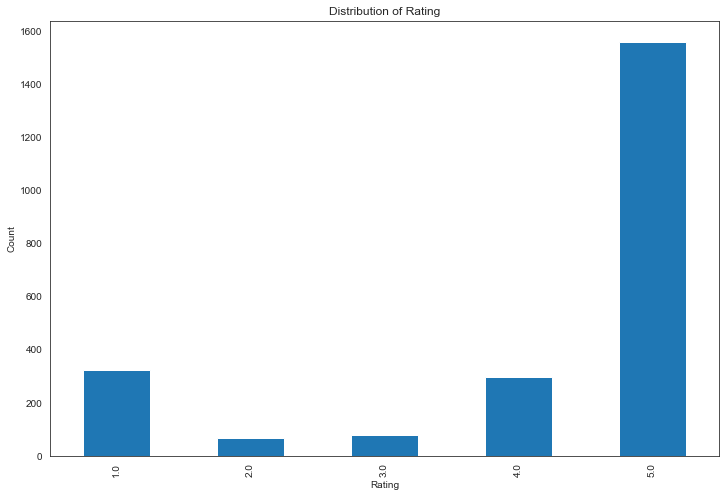

In [24]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

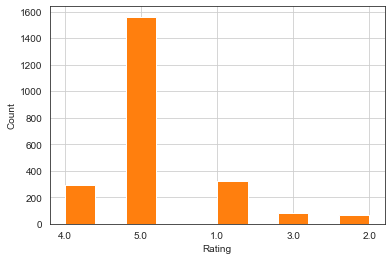

In [25]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [26]:
data.iloc[:,[3]]

,Reviews
0,Okay. So you have been seeing people display...
1,It's amazing..... battery last around 10 -12...
2,Finally a MacBook possession. Got it in 50k ...
3,We buy macbook's expecting that it will last...
4,Best Laptop under 60k. If you don't want any...
...,...
2321,Good
2322,👍👍👍
2323,Is the storage 128 gb only is sufficient for...
2324,Good value


In [27]:
Reviews=data.iloc[:,[3]]

In [28]:
Reviews.shape

(2326, 1)

In [30]:
Reviews.describe()

,Reviews
count,2324
unique,2133
top,Good
freq,38


In [31]:
Reviews.dtypes

Reviews    object
dtype: object

In [35]:
data.head()

,Rating,Reviews
0,4.0,Okay. So you have been seeing people display...
1,5.0,It's amazing..... battery last around 10 -12...
2,5.0,Finally a MacBook possession. Got it in 50k ...
3,1.0,We buy macbook's expecting that it will last...
4,5.0,Best Laptop under 60k. If you don't want any...


In [36]:
data.Reviews.isna().sum()

2

In [37]:
data['Reviews']=data['Reviews'].fillna(" ")

In [38]:
data.Reviews.isna().sum()

0

In [39]:
##Converting all review into Lowercase..###

data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [40]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [41]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

<ipython-input-41-9babcbbb57b7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews']=data['Reviews'].str.replace('[0-9]','')


In [42]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [43]:
stop_words=stopwords.words('english')

In [44]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [45]:
data.head(5)

,Rating,Reviews
0,4.0,okay seeing people display macbooks always fan...
1,5.0,amazing battery last around hrsbest laptop stu...
2,5.0,finally macbook possession got k diwali sale t...
3,1.0,buy macbooks expecting lasts least years case ...
4,5.0,best laptop k dont want accounting softwares l...


In [48]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [47]:
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1    amazing battery last around hrsbest laptop stu...
2    finally macbook possession got  diwali sale te...
3    buy macbooks expecting last least year case sa...
4    best laptop  dont want accounting software lik...
Name: Reviews, dtype: object

In [49]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aaaaa  ab  abgn  abgnac  abide  ability  abit  able  aboutrest  abovea  \
0         0   0     0       0      0        0     0     1          0       1   
1         0   0     0       0      0        0     0     0          0       0   
2         0   0     0       0      0        0     0     0          0       0   
3         0   0     0       0      0        0     0     0          0       0   
4         0   0     0       0      0        0     0     0          0       0   
...     ...  ..   ...     ...    ...      ...   ...   ...        ...     ...   
2321      0   0     0       0      0        0     0     0          0       0   
2322      0   0     0       0      0        0     0     0          0       0   
2323      0   0     0       0      0        0     0     0          0       0   
2324      0   0     0       0      0        0     0     0          0       0   
2325      0   0     0       0      0        0     0     0          0       0   

      ...  yr  yucksoftware  zenbook  z

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 3946)	0.03516744808560212
  (0, 4776)	0.024882207008526395
  (0, 5447)	0.043764069302458006
  (0, 7)	0.03420186971256424
  (0, 526)	0.045473283043457685
  (0, 364)	0.045473283043457685
  (0, 54)	0.03482785116349859
  (0, 365)	0.045473283043457685
  (0, 2220)	0.025535758479496524
  (0, 4100)	0.037236852629485166
  (0, 5953)	0.045473283043457685
  (0, 2107)	0.04135506783647143
  (0, 5171)	0.045473283043457685
  (0, 5728)	0.045473283043457685
  (0, 5071)	0.037753815817029315
  (0, 4272)	0.043764069302458006
  (0, 5722)	0.032876100536642985
  (0, 349)	0.02675879318812515
  (0, 885)	0.037236852629485166
  (0, 4845)	0.045473283043457685
  (0, 112)	0.03591108345356392
  (0, 3553)	0.02211301473965645
  (0, 2791)	0.06901324006478364
  (0, 4121)	0.045473283043457685
  (0, 5397)	0.045473283043457685
  :	:
  (2325, 2210)	0.24961770448418028
  (2325, 4127)	0.24023527194476102
  (2325, 1417)	0.232957691875315
  (2325, 4711)	0.21762904345764392
  (2325, 4371)	0.17345203515635696
  (2325, 6323)	

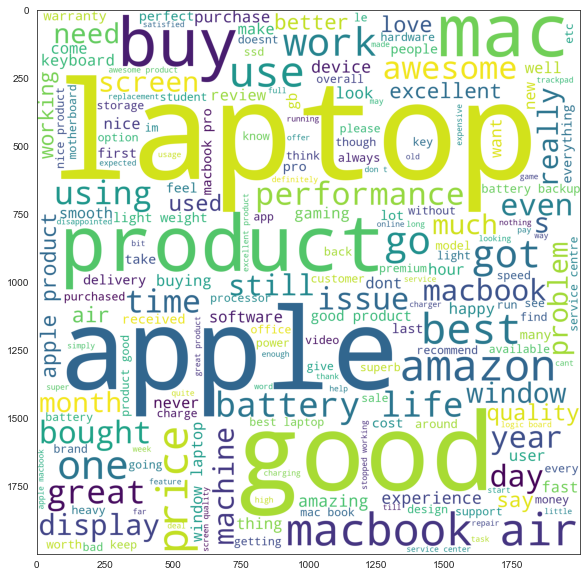

In [51]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [52]:
# # Removing Punctuation
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

<ipython-input-52-b0fce8d8a108>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')


0    okay seeing people display macbooks always fan...
1    amazing battery last around hrsbest laptop stu...
2    finally macbook possession got diwali sale tec...
3    buy macbooks expecting last least year case sa...
4    best laptop dont want accounting software like...
Name: Reviews, dtype: object

In [53]:
# #  Common word removal
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

laptop     895
product    878
apple      744
good       652
macbook    564
mac        445
air        414
battery    406
buy        354
best       345
dtype: int64

In [54]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student coder
2    finally possession got diwali sale technically...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tally busy ...
Name: Reviews, dtype: object

In [55]:
# #  Rare words removal
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq

cushion               1
sr                    1
nowin                 1
lowonly               1
ornament              1
field                 1
processorapple        1
monitorverdictthis    1
crysis                1
tutions               1
dtype: int64

In [56]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student cover
2    finally possession got dial sale technically l...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tall busy g...
5    pro light weight super fast response time high...
6    bought recently april working perfectly fine d...
7    upset checked day back december didn start luc...
8    reason star of defective piece sound quality s...
9    hi think thousand time buying one calm night m...
Name: Reviews, dtype: object

In [57]:
# # Tokenization
TextBlob(data['Reviews'][0]).words

WordList(['okay', 'seeing', 'people', 'display', 'macbooks', 'always', 'fancied', 'owning', 'one', 'premium', 'device', 'amazon', 'offer', 'reduced', 'price', 'getting', 'tempted', 'stop', 'consider', 'get', 'money', 'spend', 'think', 'add', 'premiumness', 'profile', 'device', 'next', 'line', 'support', 'withdrawn', 'resist', 'temptation', 'sell', 'last', 'reason', 'feeling', 'improves', 'profile', 'user', 'smirk', 'see', 'obsolete', 'dinosaur', 'device', 'display', 'latest', 'toysif', 'window', 'user', 'better', 'go', 'friend', 'try', 'activity', 'great', 'till', 'try', 'change', 'something', 'puny', 'mouse', 'cursor', 'realise', 'stuck', 'little', 'cozy', 'jail', 'try', 'anything', 'nonstandard', 'try', 'transferring', 'data', 'usb', 'stick', 'one', 'need', 'training', 'usb', 'partitioning', 'exfat', 'evn', 'partitioning', 'chance', 'window', 'recognise', 'usb', 'stick', 'power', 'user', 'real', 'pain', 'course', 'pretend', 'like', 'many', 'thousand', 'user', 'matter', 'hey', 'premiu

In [58]:
TextBlob(data['Reviews'][1]).words

WordList(['amazing', 'last', 'around', 'hrsbest', 'student', 'coder'])

In [59]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    okay see peopl display macbook alway fanci own...
1               amaz last around hrsbest student coder
2    final possess got diwali sale technic laptopgo...
3    macbook expect last least year case say cost r...
4    dont want account softwar like talli busi go b...
5    pro light weight super fast respons time highl...
6    bought recent april work perfectli fine day ap...
7    upset check day back decemb didnt start luckil...
8    reason star ot defect piec sound qualiti start...
9    hi think thousand time buy one calm night cudd...
Name: Reviews, dtype: object

In [60]:
# # Lemmatization
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student coder
2    finally possession got diwali sale technically...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tally busy ...
Name: Reviews, dtype: object

In [61]:
# # Advance Text Processing
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['okay', 'seeing']),
 WordList(['seeing', 'people']),
 WordList(['people', 'display']),
 WordList(['display', 'macbooks']),
 WordList(['macbooks', 'always']),
 WordList(['always', 'fancied']),
 WordList(['fancied', 'owning']),
 WordList(['owning', 'one']),
 WordList(['one', 'premium']),
 WordList(['premium', 'device']),
 WordList(['device', 'amazon']),
 WordList(['amazon', 'offer']),
 WordList(['offer', 'reduced']),
 WordList(['reduced', 'price']),
 WordList(['price', 'getting']),
 WordList(['getting', 'tempted']),
 WordList(['tempted', 'stop']),
 WordList(['stop', 'consider']),
 WordList(['consider', 'get']),
 WordList(['get', 'money']),
 WordList(['money', 'spend']),
 WordList(['spend', 'think']),
 WordList(['think', 'add']),
 WordList(['add', 'premiumness']),
 WordList(['premiumness', 'profile']),
 WordList(['profile', 'device']),
 WordList(['device', 'next']),
 WordList(['next', 'line']),
 WordList(['line', 'support']),
 WordList(['support', 'withdrawn']),
 WordList(['wit

In [62]:
# # Term frequency
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,around,2.0
1,last,2.0
2,student,1.0
3,amazing,1.0
4,coder,1.0
...,...,...
336,expiration,1.0
337,included,1.0
338,deep,1.0
339,blanket,1.0


In [63]:
# # Inverse Document Frequency
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [64]:
tf1

,words,tf,idf
0,around,2.0,3.461446
1,last,2.0,3.088466
2,student,1.0,3.880704
3,amazing,1.0,2.575756
4,coder,1.0,6.142467
...,...,...,...
336,expiration,1.0,7.751905
337,included,1.0,6.653293
338,deep,1.0,5.554681
339,blanket,1.0,7.751905


In [65]:
# The more the value of IDF, the more unique is the word.
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,around,2.0,3.461446,6.922892
1,last,2.0,3.088466,6.176932
2,student,1.0,3.880704,3.880704
3,amazing,1.0,2.575756,2.575756
4,coder,1.0,6.142467,6.142467
...,...,...,...,...
336,expiration,1.0,7.751905,7.751905
337,included,1.0,6.653293,6.653293
338,deep,1.0,5.554681,5.554681
339,blanket,1.0,7.751905,7.751905


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<2326x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 23207 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<2326x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 26605 stored elements in Compressed Sparse Row format>

In [68]:
# # Sentiment Analysis
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0     (0.15157563025210086, 0.41818394024276373)
1     (0.30000000000000004, 0.48333333333333334)
2       (-0.0043103448275862, 0.529022988505747)
3                   (-0.15, 0.23333333333333334)
4      (0.18055555555555555, 0.4601851851851852)
5       (0.3518253968253968, 0.6041269841269842)
6                    (0.11333333333333333, 0.36)
7    (-0.08833333333333333, 0.43166666666666664)
8       (0.4055555555555556, 0.5666666666666668)
9                (-0.09843749999999998, 0.54375)
Name: Reviews, dtype: object

In [69]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,okay seeing people display macbooks always fan...,0.151576
1,amazing last around hrsbest student coder,0.300000
2,finally possession got diwali sale technically...,-0.004310
3,macbooks expecting last least year case saying...,-0.150000
4,dont want accounting software like tally busy ...,0.180556


In [70]:
# # Word Embeddings
get_ipython().system('pip install gensim')
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [71]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-words.txtpd.read_csv'

In [72]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,okay seeing people display macbooks always fan...,0.151576
1,amazing last around hrsbest student coder,0.300000
2,finally possession got diwali sale technically...,-0.004310
3,macbooks expecting last least year case saying...,-0.150000
4,dont want accounting software like tally busy ...,0.180556


In [74]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
0,4.0,okay seeing people display macbooks always fan...,0.151576,0.151576
1,5.0,amazing last around hrsbest student coder,0.300000,0.300000
4,5.0,dont want accounting software like tally busy ...,0.180556,0.180556
5,5.0,pro light weight super fast response time high...,0.351825,0.351825
6,1.0,bought recently april working perfectly fine d...,0.113333,0.113333


In [75]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [84]:
sent_type(data['polarity'])

positive
positive
negative
negative
positive
positive
positive
negative
positive
negative
positive
positive
neutral
negative
negative
neutral
positive
neutral
positive
negative
negative
neutral
negative
positive
positive
positive
positive
negative
positive
negative
positive
neutral
negative
negative
positive
positive
positive
positive
negative
negative
positive
negative
positive
positive
positive
positive
neutral
positive
positive
positive
positive
positive
negative
positive
positive
positive
negative
positive
negative
negative
positive
positive
positive
negative
negative
negative
negative
negative
positive
neutral
positive
positive
positive
positive
negative
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
neutral
positive
negative
positive
positive
positive
positive
positive
negative
neutral
negative
negative
neutral
negative
positive
negative
positive
positive
positive
negative
negative
positive
negative
negative
positive
po

In [86]:
data["category"]=data['polarity']

In [87]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [88]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

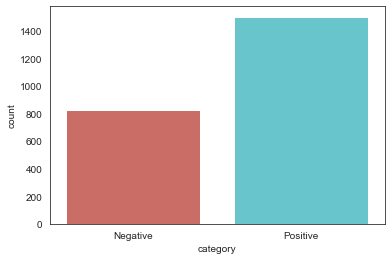

In [89]:
sns.countplot(x='category',data=data,palette='hls')

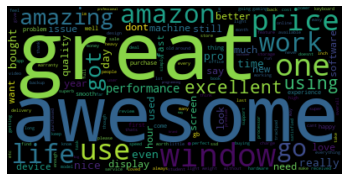

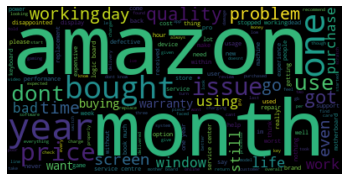

In [90]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()